<a href="https://colab.research.google.com/github/V1L3La/Learning-An-lise-de-Dados-em-Python/blob/main/Filmes_no_Brasil_2009_2019_An%C3%A1lise_de_Dados_em_Python_Aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Aumentando meu nível

https://www.kaggle.com/joaoavf/introducao-a-analise-de-dados-python-e-pandas

https://insightlab.ufc.br/6-truques-do-pandas-para-impulsionar-sua-analise-de-dados/



#Análise de dados de filmes exibidos no Brasil de 2009 a 2019

#####Com base nos dados da Ancine (https://oca.ancine.gov.br) vamos analisar os filmes exibidos no Brasil

Arquivo -> filmes_no_Brasil_2009_2019.xlsx



In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# carrega um dataframe com base no arquivo excel sem as 2 primeiras linhas do titulo e chute as 20 ultimas linhas
df = pd.read_excel('https://github.com/V1L3La/Learning-An-lise-de-Dados-em-Python/blob/main/filmes_no_Brasil_2009_2019.xlsx?raw=true', skiprows=2 ,skipfooter=20)
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


#### Analizando problemas de dados no Dataframe  
df.shape    # verifica o tamanho do dataframe   (linhas, colunas)<br>
df.dtypes   # todas colunas e os tipos [object(texto ou não sabe o que é)]<br>

*   Item da lista
*   Item da lista


df.describe()<br>
df.info()<br>
df.head(4)<br>
df.sample(10)   #lista linhas aleatórias<br>
df.tail()<br>
df.isnull().sum() retorna o número de valores ausentes para cada coluna.<br>
df.isnull().sum().sum() retorna o número total de valores ausentes.<br>
descobrir a porcentagem de valores que estão faltando, executando: df.isna().mean()<br>
    🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗<br>
help(pd.Series.loc) pedindo ajuda<br>

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.sample(10)

In [ ]:
df.tail()   # nan  = not a number

In [13]:
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [11]:
df.dtypes


Ano de exibição                     int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Público no ano de exibição         object
Renda (R$) no ano de exibição      object
dtype: object

In [ ]:
#----1
# Transformar o campo Data de lançamento em data
df['Data de lançamento'] = pd.to_datetime(df['Data de lançamento'])

In [14]:
#---2
# identificar o problema da coluna Data de lançamento
df['Data de lançamento'].value_counts() 


Relançamento    198
42341            33
41264            33
41607            29
41215            27
               ... 
relançamento      1
41922             1
41913             1
40328             1
42188             1
Name: Data de lançamento, Length: 878, dtype: int64

In [60]:
#---3
# exibir Data de lançamento  como relançamento
df[df['Data de lançamento'] == 'Relançamento']

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda_total_exibição
6,2019,A Bela da Tarde,E1700492900000,Ficção,"França, Itália",Estrangeira,Relançamento,Zeta Filmes,Distribuição Nacional,14,253
278,2019,Gritos e Sussurros,E1600273100000,Ficção,Suécia,Estrangeira,Relançamento,F. J. Cines,Distribuição Nacional,105,1024
359,2019,Matrix,E1500096600000,Ficção,"Austrália, Estados Unidos",Estrangeira,Relançamento,Warner,Distribuição Internacional,18260,277563
390,2019,Morangos Silvestres,E1500804700000,Ficção,Suécia,Estrangeira,Relançamento,F. J. Cines,Distribuição Nacional,129,1230
396,2019,Mulholland Drive - Cidade dos Sonhos,E1700486000000,Ficção,"Estados Unidos, França",Estrangeira,Relançamento,Zeta Filmes,Distribuição Nacional,50,920
...,...,...,...,...,...,...,...,...,...,...,...
6503,2009,A agenda,E1600634500000,Ficção,França,Estrangeira,Relançamento,Imovision,Distribuição Nacional,33,154.5
6738,2009,Fome de Viver,E1600228600000,Ficção,Reino Unido,Estrangeira,Relançamento,Filmes do Estação,Distribuição Nacional,268,944
6917,2009,Os Contos de Canterbury,E1600589800000,Ficção,Itália,Estrangeira,Relançamento,Pandora Filmes,Distribuição Nacional,5026,29614
6965,2009,Ratatouille,E1500365600000,Animação,Estados Unidos,Estrangeira,Relançamento,Sony,Distribuição Internacional,230,2300


#### Decisão sobre dados incorretos/ faltantes/divergentes

apagar?   atualizar manual os dados? o que fazer? Qual decisão?

In [18]:
df.shape

(7081, 11)

In [23]:
df_novo.shape

(6883, 11)

In [53]:
#---4
#criar(copia) um novo dataframe sem as linhas Relançamentos (-198 linhas)
df_novo = df[df['Data de lançamento'] != 'Relançamento']
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda_total_exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [24]:
df.dtypes

Ano de exibição                     int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Público no ano de exibição         object
Renda (R$) no ano de exibição      object
dtype: object

In [ ]:
#---5
# converter a coluna Data de lançamento para datetime
# df_novo['Data de lançamento'] = pd.to_datetime(df_novo['Data de lançamento'])

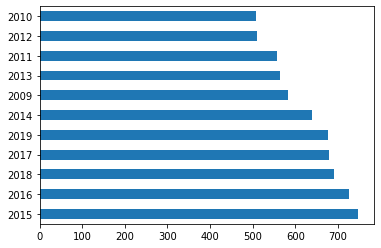

In [54]:
df_novo['Ano de exibição'].value_counts().plot.barh()

In [55]:
df_novo.rename(columns={'Renda (R$) no ano de exibição': 'Renda_total_exibição'}, inplace = True)   # troca o nome de uma coluna
df_novo.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda_total_exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [62]:
# df[df['mensalidade'] == df['mensalidade'].max()] 
# df_novo[df_novo['Público no ano de exibição'] == int(df_novo['Público no ano de exibição'].max())]
df_novo.nlargest(3, 'Renda_total_exibição')

# 54 03

TypeError: ignored